## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 2. Reading *companies* and *rounds2* files

In [2]:
companies=pd.read_csv("companies.csv",engine="python")
rounds2=pd.read_csv("rounds2.csv",engine="python")

<font color=blue> The **rounds2** and **companies** files have been read using parser engine as Python to detect the seperator and parse the file to avoid any encoding issues. </Font>

## 3. Viewing *rounds2* and *companies* Dataframes

### 3.1 Understanding *rounds2* dataframe

In [3]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### 3.1.1 Observations

<font color=blue> The **rounds2** file has a total of 1,14,949 entries with 6 columns. It has a few null values in the ***funding_round_code*** and ***raised_amount_usd*** columns. </Font>

### 3.2 Understanding *companies* Dataframe

In [6]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [8]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

### 3.2.1 Observations

<font color=blue> The **companies** file has a total of 66368 entries with 10 columns. It has null values in all the columns except ***permalink*** and ***status*** columns. </Font>

## 4. Calculating Unique Company IDs in *rounds2* Dataframe

In [9]:
rounds2['company_permalink'].value_counts()

/ORGANIZATION/SOLARFLARE                      10
/organization/exagen-diagnostics               9
/ORGANIZATION/ENDOGASTRIC-SOLUTIONS            9
/ORGANIZATION/EXAGEN-DIAGNOSTICS               9
/organization/solarflare                       9
                                              ..
/ORGANIZATION/RADCOM                           1
/organization/socialdial                       1
/organization/pixelpipe                        1
/ORGANIZATION/ABHINAV-OUTSOURCINGS-PVT-LTD     1
/ORGANIZATION/WELLCORE                         1
Name: company_permalink, Length: 90247, dtype: int64

In [10]:
len(pd.unique(rounds2['company_permalink'].str.lower()))

66368

### 4.1 Observations

-  <font color=blue>It is to be noted that the column named ***company_permalink*** is unique to every company. Hence that has to be used to identify unique Company IDs in the file.
-  It was noted that some of the values in the ***company_permalink*** column were found to be in *lower_case* while some were in *upper_case*.
-  A total of **66,368** unique company IDs were found. This was done after converting all texts in that column to lower case.</Font>

## 5. Calculating Unique Company IDs in *companies* Dataframe

In [11]:
companies['permalink'].value_counts()

/Organization/Mobclix                                     1
/Organization/Matchpin                                    1
/Organization/E4-X-Inc                                    1
/Organization/Golfmds-Inc                                 1
/Organization/Qlue                                        1
                                                         ..
/Organization/University-Of-North-Carolina-Chapel-Hill    1
/Organization/Docker                                      1
/Organization/Tarsa-Therapeutics                          1
/Organization/Magenta-Computacion                         1
/Organization/Capitalizarme                               1
Name: permalink, Length: 66368, dtype: int64

In [12]:
len(pd.unique(companies['permalink'].str.lower()))

66368

### 5.1 Observations

-  <font color=blue>It is to be noted that the column named ***permalink*** is unique to every company. Hence that has to be used to identify unique Company IDs in the file.
-  A total of **66,368** unique company IDs were found. This was done after converting all texts in that column to lower case.</Font>

## 6. Checking for IDs in *rounds2* not in *companies* Dataframe and vice-versa

In [13]:
rounds2.loc[~rounds2['company_permalink'].str.lower().isin(companies['permalink'].str.lower())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [14]:
companies.loc[~companies['permalink'].str.lower().isin(rounds2['company_permalink'].str.lower())]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


### 6.1 Observation

-  <font color=blue>No company IDs were found in ***rounds2*** dataframe that were not there in ***companies*** Dataframe.</font>
-  <font color=blue>No company IDs were found in ***companies*** dataframe that were not there in ***rounds2*** Dataframe.</font>

## 7. Merging *companies* on *rounds2* dataframe

### 7.1 Converting the common ID in both dataframes to same format - lower_case

In [15]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
companies['permalink']=companies['permalink'].str.lower()

### 7.2 Merging the two dataframes using their common IDs

In [16]:
master_frame=rounds2.merge(companies,how='inner',left_on='company_permalink',right_on='permalink').reset_index(drop=True)

In [17]:
master_frame.shape

(114949, 16)

### 7.3 Observation

-  <font color=blue>It was earlier noted that the unique IDs in both the dataframes were only 66,368 and both files had only the same companies. So on performing an *inner* merge, we get a dataframe of 1,14,949 x 16 entries.</font>

## 8. Understanding the master_frame

In [18]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### 8.1 Understanding missing values in master_frame

In [19]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2).sort_values(ascending=False)

funding_round_code         72.91
founded_at                 17.85
raised_amount_usd          17.39
state_code                  9.52
city                        8.84
region                      8.84
country_code                7.55
homepage_url                5.34
category_list               2.97
status                      0.00
name                        0.00
permalink                   0.00
funded_at                   0.00
funding_round_type          0.00
funding_round_permalink     0.00
company_permalink           0.00
dtype: float64

### 8.2 Observation

-  <font color=blue>It is observed that the column named ***funding_round_code*** has **72.91%** null values. This is a lot of null values and cannot be filled. So a logical decision can be made to remove this particular column.
-  Similarly the column named ***founded_at*** has **17.85%** and ***homepage_url*** has **5.34%** null values. As this cannot be filled manually and has no logical relevance to this particular analysis this can be removed too.
-  The columns ***state_code***, ***city*** and ***region*** have no use case in this particular analysis as mentioned in the problem. So we can remove those too.
-  It is to be noted that eventhough the column named ***raised_amount_usd*** has **17.39%** of null values, this cannot be removed as it is important for this particular analysis. Methods have to be looked at to treat this particular column. </font>

### 8.3 Removing unwanted columns

In [20]:
master_frame.drop(columns=['funding_round_code','founded_at','homepage_url','state_code','city','region'],inplace=True)

In [21]:
master_frame.shape

(114949, 10)

## 9. Treating missing Values in *raised_amount_usd* column

In [22]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [23]:
master_frame['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

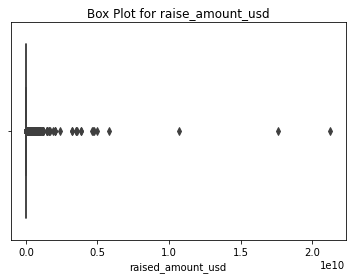

In [24]:
sns.boxplot(master_frame['raised_amount_usd'])
plt.title('Box Plot for raise_amount_usd')
plt.show()

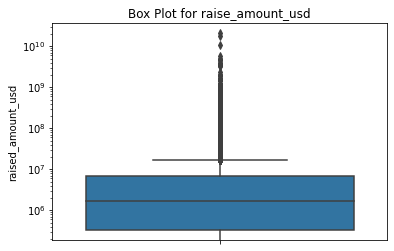

In [25]:
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.title('Box Plot for raise_amount_usd')
plt.yscale('log')
plt.show()

### 9.1 Observation

-  <font color=blue>It is observed that there are nearly 19990 null values out of nearly 114949 entries (approximately 17%).
-  The ***mean*** of the observations is nearly **1,00,00,000 US Dollars***. The ***median*** is approx. ***16,80,500 USD***. Th 75th %ile is approx. 70,00,000 USD. There is a very high variation between these values. This could be due to many outliers.
-  To tackle this uncertain situation, it is better to ***remove these null values (approx 17% of the data)***. </font>

In [26]:
master_frame=master_frame.loc[master_frame['raised_amount_usd'].notnull()]
master_frame.shape

(94959, 10)

## 10. Treating missing values in *country_code* column

In [27]:
round(100*(master_frame['country_code'].value_counts()/len(master_frame.index)),2).sort_values(ascending=False)

USA    65.34
GBR     5.29
CAN     2.75
CHN     2.03
IND     1.74
       ...  
KHM     0.00
TUN     0.00
MCO     0.00
ALB     0.00
MKD     0.00
Name: country_code, Length: 134, dtype: float64

### 10.1 Observation

-  <font color=blue>It is noted that nearly 65% of the values are ***USA***. But as this is a categorical variable I feel using this 65% value to fill the other missing values might not be the best way here as it could inflate the values of USA. So it is better to ***remove the missing rows*** in this column.</font>

In [28]:
master_frame=master_frame.loc[master_frame['country_code'].notnull()]
master_frame.shape

(89108, 10)

In [29]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2).sort_values(ascending=False)

category_list              0.65
country_code               0.00
status                     0.00
name                       0.00
permalink                  0.00
raised_amount_usd          0.00
funded_at                  0.00
funding_round_type         0.00
funding_round_permalink    0.00
company_permalink          0.00
dtype: float64

## 11. Treating missing values in *category_list* column

In [30]:
master_frame['category_list'].isnull().sum()

579

### 11.1 Observation

-  <font color=blue>It is noted that there are only 579 missing values (approx. 0.65%). These rows can be removed as it will not have a major impact.</font>

In [31]:
master_frame=master_frame.loc[master_frame['category_list'].notnull()]
master_frame.shape

(88529, 10)

In [32]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2).sort_values(ascending=False)

country_code               0.0
status                     0.0
category_list              0.0
name                       0.0
permalink                  0.0
raised_amount_usd          0.0
funded_at                  0.0
funding_round_type         0.0
funding_round_permalink    0.0
company_permalink          0.0
dtype: float64

-  <font color=blue>Now all the missing values have been treated and verified. The shape of the ***master_frame*** is now **88,529 x 10**.</font>

# <font color=red> END OF CHECKPOINT 1 </font>

## 12. Understanding the *raised_amount_usd* based on *funding_round_type*

In [33]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

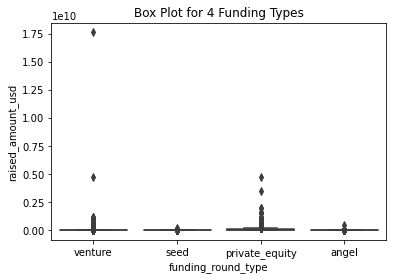

In [34]:
master_frame_types=master_frame.loc[(master_frame['funding_round_type']=='venture')|(master_frame['funding_round_type']=='angel')|(master_frame['funding_round_type']=='seed')|(master_frame['funding_round_type']=='private_equity')]
sns.boxplot(x=master_frame_types['funding_round_type'],y=master_frame_types['raised_amount_usd'],data=master_frame_types)
plt.title('Box Plot for 4 Funding Types')
plt.show()

-  <font color=blue>As the scale is not uniform, it will be better to view it in a log scale for the y axis.</font>

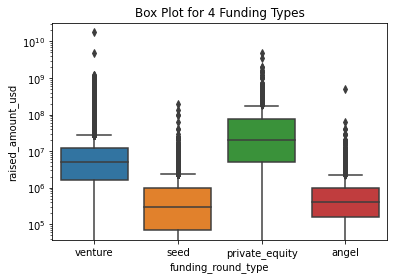

In [35]:
sns.boxplot(x=master_frame_types['funding_round_type'],y=master_frame_types['raised_amount_usd'],data=master_frame_types)
plt.title('Box Plot for 4 Funding Types')
plt.yscale('log')
plt.show()

In [36]:
master_frame.loc[master_frame['funding_round_type']=='venture']['raised_amount_usd'].describe()

count    4.780900e+04
mean     1.172422e+07
std      8.821571e+07
min      0.000000e+00
25%      1.600000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [37]:
master_frame.loc[master_frame['funding_round_type']=='seed']['raised_amount_usd'].describe()

count    2.109500e+04
mean     7.477937e+05
std      2.288318e+06
min      0.000000e+00
25%      6.881650e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64

In [38]:
master_frame.loc[master_frame['funding_round_type']=='private_equity']['raised_amount_usd'].describe()

count    1.820000e+03
mean     7.393849e+07
std      2.017765e+08
min      0.000000e+00
25%      5.000000e+06
50%      2.000000e+07
75%      7.576257e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64

In [39]:
master_frame.loc[master_frame['funding_round_type']=='angel']['raised_amount_usd'].describe()

count    4.400000e+03
mean     9.715739e+05
std      7.710904e+06
min      0.000000e+00
25%      1.527565e+05
50%      4.149060e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64

### 12.1 Mean of Funding Types

In [40]:
master_frame_types.groupby(['funding_round_type'],as_index=False)['raised_amount_usd'].mean()

,funding_round_type,raised_amount_usd
0,angel,9.715739e+05
1,private_equity,7.393849e+07
2,seed,7.477937e+05
3,venture,1.172422e+07


### 12.2 Median of Funding Types

In [41]:
master_frame_types.groupby(['funding_round_type'],as_index=False)['raised_amount_usd'].median()

,funding_round_type,raised_amount_usd
0,angel,414906.0
1,private_equity,20000000.0
2,seed,300000.0
3,venture,5000000.0


### 12.3 Observation

-  <font color=blue>For the ***Venture*** type the mean is **1.172422e+07** and median is **5.000000e+06**. By observing the box plots it is noticed that the mean could be inflated due to the presence of outliers.
-  For the ***Seed*** type the mean is **7.477937e+05** and median is **3.000000e+05**. By observing the box plots it is noticed that the mean could be inflated due to the presence of outliers.
-  For the ***Private Equity*** type the mean is **7.393849e+07** and median is **2.000000e+07**. By observing the box plots it is noticed that the mean could be inflated due to the presence of outliers.
-  For the ***Angel*** type the mean is **9.715739e+05** and median is **4.149060e+05**. By observing the box plots it is noticed that the mean could be inflated due to the presence of outliers.
- Thus the **representative values** for the 4 types of the funding could be taken as their **medians**.</dont>

### 12.4 Findings

-  <font color=blue>Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, the investment type that will be the most suitable will be **Venture** as its representative value is 5 million USD.</font>

## 13. Filtering Data based on *Venture* type for further analysis

In [42]:
master_venture=master_frame.loc[master_frame['funding_round_type']=='venture']

In [43]:
master_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA


# <font color=red>END OF CHECKPOINT 2</font>

## 14. Country Analysis for Investment

In [44]:
master_venture['country_code'].value_counts()

USA    35943
GBR     2041
CHN     1548
CAN     1246
FRA      912
       ...  
GTM        1
KNA        1
BAH        1
UGA        1
KWT        1
Name: country_code, Length: 97, dtype: int64

### 14.1 Top 9 Countries by Investment Amount

In [45]:
top9=master_venture.groupby(['country_code'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(9)
top9.reset_index(drop=True,inplace=True)

In [46]:
top9

,country_code,raised_amount_usd
0,USA,4.200680e+11
1,CHN,3.933892e+10
2,GBR,2.007281e+10
3,IND,1.426151e+10
4,CAN,9.482218e+09
5,FRA,7.226851e+09
6,ISR,6.854350e+09
7,DEU,6.306922e+09
8,JPN,3.167647e+09


### 14.2 Forming a Dataframe with data obtained from *wikipedia* on countires where Official Language - English

In [47]:
eng_data={'country_code':['USA','GBR','IND','CAN'],'Eng_Speaking':['Yes','Yes','Yes','Yes']}
eng_speaking=pd.DataFrame(eng_data)

In [48]:
top9_eng=top9.merge(eng_speaking,how='left',on='country_code').reset_index(drop=True)

In [49]:
top9_eng

,country_code,raised_amount_usd,Eng_Speaking
0,USA,4.200680e+11,Yes
1,CHN,3.933892e+10,NaN
2,GBR,2.007281e+10,Yes
3,IND,1.426151e+10,Yes
4,CAN,9.482218e+09,Yes
5,FRA,7.226851e+09,NaN
6,ISR,6.854350e+09,NaN
7,DEU,6.306922e+09,NaN
8,JPN,3.167647e+09,NaN


### 14.3 Top 3 Investment Countires with Official Language - English

In [50]:
top9_eng.loc[top9_eng['Eng_Speaking']=="Yes"].sort_values(by='raised_amount_usd',ascending=False).head(3)

,country_code,raised_amount_usd,Eng_Speaking
0,USA,4.200680e+11,Yes
2,GBR,2.007281e+10,Yes
3,IND,1.426151e+10,Yes


In [51]:
master_venture=master_venture.loc[(master_venture['country_code']=="USA")|(master_venture['country_code']=="GBR")|(master_venture['country_code']=="IND")]

In [52]:
master_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA


### 14.4 Observations

-  <font color=blue>The top 9 Countries with most invesments were identified - **USA, CHN, GBR, IND, CAN, FRA, ISR, DEU, JPN** (in that order).
-  The top 9 Countries were then classified as Official Language - English or Not English.
-  Top 3 Countries with Official Langauge as English and highest investments were identified - **USA, GBR, IND** (in that order). </font>

# <font color=red>END OF CHECKPOINT 3 </font>

## 15. Sector Analysis

### 15.1 Reading and analyzing the *mapping* file

In [53]:
mapping=pd.read_csv("mapping.csv")

In [54]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### 15.2 Changing the shape of the *mapping* file using *pd.melt*

In [55]:
mapping_melt=pd.melt(mapping,id_vars=['category_list'],value_vars=list(mapping.columns[1:]))
mapping_melt=mapping_melt.loc[mapping_melt['value']==1]
mapping_melt.rename(columns={'variable':'sector'},inplace=True)
mapping_melt.drop(columns=['value'],inplace=True)
mapping_melt.sample(5)

,category_list,sector
5413,Simulation,Others
1959,Semiconductor Manufacturing Equipment,Cleantech / Semiconductors
5676,Cyber,"Social, Finance, Analytics, Advertising"
2149,Business Travelers,Entertainment
2805,Baby Safety,Health


### 15.3 Replacing '0' in the strings with 'na'

In [56]:
mapping_melt['category_list']=mapping_melt['category_list'].str.replace('0','na')
mapping_melt['category_list']=mapping_melt['category_list'].str.replace('2.na','2.0')

In [57]:
mapping_melt.sample(5)

,category_list,sector
5341,Physical Security,Others
5510,Ad Targeting,"Social, Finance, Analytics, Advertising"
2159,Celebrity,Entertainment
2748,Wine And Spirits,Entertainment
5315,Open Source,Others


In [58]:
mapping_melt.sector.value_counts()

Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: sector, dtype: int64

### 15.4 Observations

-  <font color=blue>The mapping file was in a **wide format**. It had to converted to a **long format** before it can be merged to master frame. ***pd.melt*** was used to achieve this.
-  It is also noted that there are a few categories where there seems to be a 0 in the text. By carefully looking at all such values, it is seen that they should be replaced by 'na'. 
-  Also, there is a category called ***'Enterprise 2.0'***. It should be taken care that the 0 remains 0 and not 'na'.</font>

### 15.5 Analyzing *category_list* in master frame

In [59]:
master_venture['category_list_primary']=master_venture['category_list'].apply(lambda x: x.split('|')[0])

In [60]:
master_venture.sample(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,category_list_primary
43340,/organization/health-integrated,/funding-round/365c6d0b302c0fca52841e16c854c245,venture,19-04-2013,124628.0,/organization/health-integrated,Health Integrated,Biotechnology,operating,USA,Biotechnology
47616,/organization/infopia,/funding-round/0a9ebf898cbae04bbbcbf90d1409ea9a,venture,15-04-2008,12000000.0,/organization/infopia,Infopia,Software,closed,USA,Software
61571,/organization/michelson-diagnostics,/funding-round/1b82de56811c6b2b2199cb861035447e,venture,13-01-2014,3250000.0,/organization/michelson-diagnostics,Michelson Diagnostics,Biotechnology|Health Diagnostics,operating,GBR,Biotechnology
92521,/organization/somerset-outpatient-surgery,/funding-round/8fb789b6549bddb8f57b1c57cc83493d,venture,08-06-2009,580000.0,/organization/somerset-outpatient-surgery,Somerset Outpatient Surgery,Biotechnology,operating,USA,Biotechnology
63973,/organization/morganfranklin-consulting,/funding-round/098be76380a24ef213a5f157367160be,venture,17-04-2014,4822000.0,/organization/morganfranklin-consulting,MorganFranklin Consulting,Consulting,operating,USA,Consulting
28065,/organization/discover-books-llc,/funding-round/846b8c18888a82d329c3ab1ed4bb302e,venture,04-01-2011,8500000.0,/organization/discover-books-llc,"Discover Books, LLC",E-Commerce|Information Technology|Internet|Rec...,operating,USA,E-Commerce
105816,/organization/varonis-systems,/funding-round/cee2512ae077e0b73f2589992a4df225,venture,09-02-2012,1000000.0,/organization/varonis-systems,Varonis Systems,Big Data Analytics|Software,ipo,USA,Big Data Analytics
19784,/organization/cirba-inc,/funding-round/f72867907020c7502dfaab6c08aeefee,venture,27-03-2012,15000000.0,/organization/cirba-inc,Cirba,Analytics,operating,USA,Analytics
54588,/organization/last-fm,/funding-round/93351269e78e828c04735437537b0d16,venture,01-05-2006,5000000.0,/organization/last-fm,Last.fm,Music|Social Media,acquired,GBR,Music
50256,/organization/islanddatacorporation,/funding-round/7a2892578a959e039bfd446cd4ebf2c0,venture,05-03-2007,5000000.0,/organization/islanddatacorporation,Overtone,Analytics|SaaS|Social Media|Social Media Monit...,acquired,USA,Analytics


In [61]:
master_venture['category_list_primary']=master_venture['category_list_primary'].str.lower()
mapping_melt['category_list']=mapping_melt['category_list'].str.lower()

In [62]:
master_venture=master_venture.merge(mapping_melt,how='left',left_on='category_list_primary',right_on='category_list').reset_index(drop=True)

### 15.6 Observations

-  <font color=blue>The ***category_list*** column was prepared by splitting the primary category by seperating them using the **'|' seperator**. Then they were merged to the mapping file to get the sectors.</font>

In [63]:
master_venture['sector'].value_counts()

Others                                     9114
Cleantech / Semiconductors                 8492
Social, Finance, Analytics, Advertising    7814
News, Search and Messaging                 4727
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         580
Name: sector, dtype: int64

In [64]:
master_venture['sector'].isnull().sum()

11

In [65]:
master_venture.loc[master_venture['sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,category_list_primary,category_list_y,sector
7345,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,natural gas uses,NaN,NaN
10162,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,/organization/dolores-speech-products,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,adaptive equipment,NaN,NaN
12375,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,/organization/fia-formula-e,FIA Formula E,Racing,closed,GBR,racing,NaN,NaN
12630,/organization/five-below,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,/organization/five-below,Five Below,Specialty Retail,ipo,USA,specialty retail,NaN,NaN
14956,/organization/healthtell,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,/organization/healthtell,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,biotechnology and semiconductor,NaN,NaN
17882,/organization/justinmind,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,/organization/justinmind,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,rapidly expanding,NaN,NaN
23816,/organization/omega-point-research,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,/organization/omega-point-research,Omega Point Research,Product Search,closed,USA,product search,NaN,NaN
29949,/organization/sense-labs-inc-,/funding-round/1ed09dae5b9feaba2ae7f56dd1b9bfd2,venture,29-12-2014,2499999.0,/organization/sense-labs-inc-,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,greentech,NaN,NaN
30210,/organization/shantiniketan-incorporated,/funding-round/96f7fa1fdcc380649723c8effc2a1062,venture,01-08-2008,1100000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,Retirement,closed,USA,retirement,NaN,NaN
30211,/organization/shantiniketan-incorporated,/funding-round/c6baca436fa80360921d89a06a0a0e93,venture,01-05-2011,2000000.0,/organization/shantiniketan-incorporated,ShantiNiketan Inc.,Retirement,closed,USA,retirement,NaN,NaN


### 15.7 Treating the missing values

-  <font color=blue>There are a total of 11 missing sectors for the categories. From the category names, we can map them to their respective categories or place them in others.
-  ***natural gas and uses*** - **Cleantech / Semiconductors** 
-  ***adaptive equipment*** - **Others**
-  ***racing*** - **Automotive & Sports**
-  ***speciality retail*** - **Social, Finance, Analytics, Advertising**
-  ***biotechnology and semiconductor*** - **Cleantech / Semiconductors**
-  ***rapidly expanding*** - **Others**
-  ***product search*** - **News, Search and Messaging**
-  ***greentech*** - **Cleantech / Semiconductors**
-  ***retirement*** - **Others** </font>

In [66]:
master_venture['sector']=np.where(master_venture['category_list_primary']=="natural gas uses","Cleantech / Semiconductors",np.where(master_venture['category_list_primary']=="adaptive equipment","Others",np.where(master_venture['category_list_primary']=="racing","Automotive & Sports",np.where(master_venture['category_list_primary']=="specialty retail","Social, Finance, Analytics, Advertising",np.where(master_venture['category_list_primary']=="biotechnology and semiconductor","Cleantech / Semiconductors",np.where(master_venture['category_list_primary']=="rapidly expanding","Others",np.where(master_venture['category_list_primary']=="product search","News, Search and Messaging",np.where(master_venture['category_list_primary']=="greentech","Cleantech / Semiconductors",np.where(master_venture['category_list_primary']=="retirement","Others",master_venture['sector'])))))))))

In [67]:
master_venture.loc[master_venture['sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,category_list_primary,category_list_y,sector


In [68]:
master_venture['sector'].value_counts()

Others                                     9119
Cleantech / Semiconductors                 8495
Social, Finance, Analytics, Advertising    7815
News, Search and Messaging                 4728
Health                                     3429
Manufacturing                              2630
Entertainment                              2006
Automotive & Sports                         581
Name: sector, dtype: int64

### 15.8 Observations

-  <font color=blue>The null values in the sector columns were treated by assigning the corresponding categories to the closest resembling sector.</font>

# <font color=red>END OF CHECKPOINT 4 </font>

## 16. Sector and Country wise Analysis

In [69]:
top3_master=master_venture.loc[(master_venture['country_code']=="USA")|(master_venture['country_code']=="GBR")|(master_venture['country_code']=="IND")]
D1 = master_venture.loc[master_venture['country_code']=="USA"]
D2 = master_venture.loc[master_venture['country_code']=="GBR"]
D3 = master_venture.loc[master_venture['country_code']=="IND"]

In [70]:
D1=D1[(D1['raised_amount_usd']>=5000000)&(D1['raised_amount_usd']<=15000000)]
D2=D2[(D2['raised_amount_usd']>=5000000)&(D2['raised_amount_usd']<=15000000)]
D3=D3[(D3['raised_amount_usd']>=5000000)&(D3['raised_amount_usd']<=15000000)]

### 16.1 Observation

-  <font color=blue>From the master dataframe of ***Venture*** Funding Type, the ***Top 3 Countries with Official language as English(USA,GBR and IND)*** were selected and placed into 3 seperate Dataframes.
-  Further, from these dataframes only the observations whose investments lie in the range of ***5 to 15 Million USD*** were selected.</font>

### 16.2 Sector wise Investment Amounts in USA

In [71]:
D1.groupby(['sector'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,2.632101e+10
7,"Social, Finance, Analytics, Advertising",2.380738e+10
1,Cleantech / Semiconductors,2.164292e+10
5,"News, Search and Messaging",1.397157e+10
3,Health,8.211859e+09
4,Manufacturing,7.258553e+09
2,Entertainment,5.099198e+09
0,Automotive & Sports,1.454104e+09


### 16.3 Sector wise Investment Amounts in GBR

In [72]:
D2.groupby(['sector'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,1.283624e+09
1,Cleantech / Semiconductors,1.163990e+09
7,"Social, Finance, Analytics, Advertising",1.089404e+09
5,"News, Search and Messaging",6.157462e+08
2,Entertainment,4.827847e+08
4,Manufacturing,3.619403e+08
3,Health,2.145375e+08
0,Automotive & Sports,1.670516e+08


### 16.4 Sector wise Investment Amounts in IND

In [73]:
D3.groupby(['sector'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,1.013410e+09
7,"Social, Finance, Analytics, Advertising",5.505496e+08
5,"News, Search and Messaging",4.338345e+08
2,Entertainment,2.808300e+08
4,Manufacturing,2.009000e+08
3,Health,1.677400e+08
1,Cleantech / Semiconductors,1.653800e+08
0,Automotive & Sports,1.369000e+08


### 16.5 Comparing Sector wise Investment Amount in USA,GBR and IND using barplot

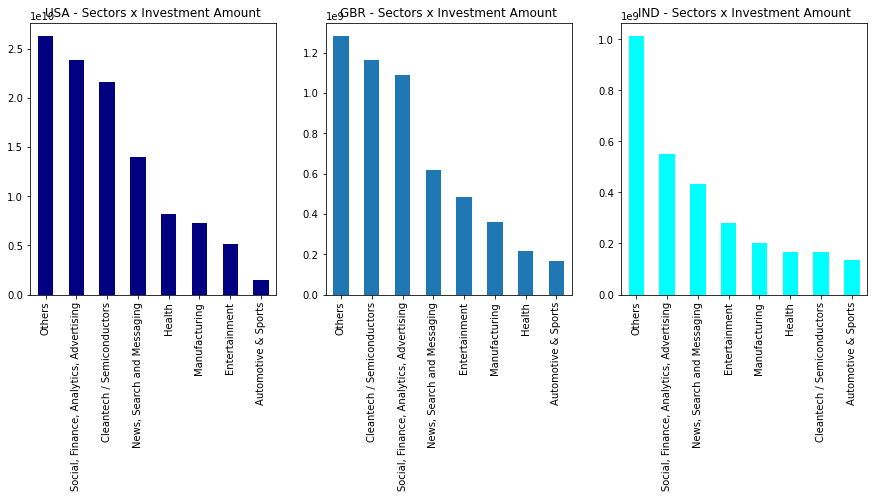

In [74]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
(D1.groupby(['sector'],as_index=True)['raised_amount_usd'].sum().sort_values(ascending=False)).plot.bar(color='navy')
plt.title("USA - Sectors x Investment Amount")
plt.xlabel('')

plt.subplot(1, 3, 2)
(D2.groupby(['sector'],as_index=True)['raised_amount_usd'].sum().sort_values(ascending=False)).plot.bar()
plt.title("GBR - Sectors x Investment Amount")
plt.xlabel('')

plt.subplot(1, 3, 3)
(D3.groupby(['sector'],as_index=True)['raised_amount_usd'].sum().sort_values(ascending=False)).plot.bar(color='cyan')
plt.title("IND - Sectors x Investment Amount")
plt.xlabel('')
plt.show()

### 16.6 Observation

-  <font color=blue>From the Investment Amounts across the sectors in the Top 3 Countries(USA, GBR and IND) the following are observed:
    -  Others Sector has the maximum investment in all the three countries.
    -  In USA, the top 3 sectors are ***1. Others, 2. Social Finance Analytics Advertising and 3. Cleantech/Semiconductors.***
    -  In GBR, the top 3 sectors are ***1. Others, 2. Cleantech/Semiconductors and 3. Social Finance Analytics Advertising.***
    -  In IND, the top 3 sectors are ***1. Others, 2. Social Finance Analytics Advertising and 3. News Search and Messaging.***

</font>

### 16.7 Sector wise Investment Counts in USA

In [75]:
D1.groupby(['sector'],as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,2950
7,"Social, Finance, Analytics, Advertising",2714
1,Cleantech / Semiconductors,2351
5,"News, Search and Messaging",1583
3,Health,909
4,Manufacturing,799
2,Entertainment,591
0,Automotive & Sports,167


### 16.8 Sector wise Investment Counts in GBR

In [76]:
D2.groupby(['sector'],as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,147
7,"Social, Finance, Analytics, Advertising",133
1,Cleantech / Semiconductors,130
5,"News, Search and Messaging",73
2,Entertainment,56
4,Manufacturing,42
3,Health,24
0,Automotive & Sports,16


### 16.9 Sector wise Investment Counts in IND

In [77]:
D3.groupby(['sector'],as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False)

,sector,raised_amount_usd
6,Others,110
7,"Social, Finance, Analytics, Advertising",60
5,"News, Search and Messaging",52
2,Entertainment,33
4,Manufacturing,21
1,Cleantech / Semiconductors,20
3,Health,19
0,Automotive & Sports,13


### 16.10 Comparing Sector wise Investment Counts in USA,GBR and IND using barplot

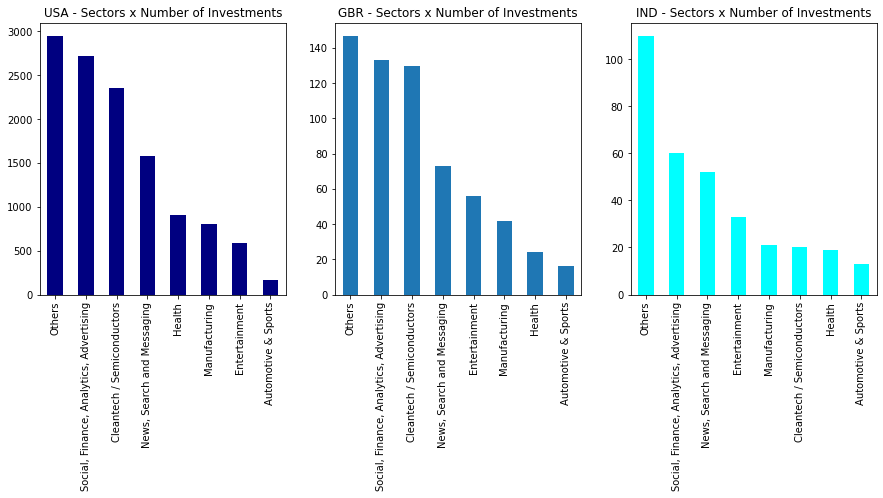

In [78]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
(D1.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False)).plot.bar(color='navy')
plt.title("USA - Sectors x Number of Investments")
plt.xlabel('')

plt.subplot(1, 3, 2)
(D2.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False)).plot.bar()
plt.title("GBR - Sectors x Number of Investments")
plt.xlabel('')

plt.subplot(1, 3, 3)
(D3.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False)).plot.bar(color='cyan')
plt.xlabel('')
plt.title("IND - Sectors x Number of Investments")
plt.show()

### 16.11 Observation

-  <font color=blue>From the Number of Investments across the sectors in the Top 3 Countries(USA, GBR and IND) the following are observed:
    -  Others Sector has the maximum number of investment in all the three countries.
    -  In USA, the top 3 sectors are ***1. Others, 2. Social Finance Analytics Advertising and 3. Cleantech/Semiconductors.***
    -  In GBR, the top 3 sectors are ***1. Others, 2. Social Finance Analytics Advertising and 3. Cleantech/Semiconductors.***
    -  In IND, the top 3 sectors are ***1. Others, 2. Social Finance Analytics Advertising and 3. News Search and Messaging.***

</font>

### 16.12 Number of Investments x Countries

In [79]:
top3_countries=D1.append(D2).reset_index(drop=True)
top3_countries=top3_countries.append(D3).reset_index(drop=True)
top3_countries.groupby(['country_code'],as_index=False)['raised_amount_usd'].count().sort_values(by='raised_amount_usd',ascending=False)

,country_code,raised_amount_usd
2,USA,12064
0,GBR,621
1,IND,328


### 16.13 Investment Amount x Countries

In [80]:
top3_countries.groupby(['country_code'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False)

,country_code,raised_amount_usd
2,USA,1.077666e+11
0,GBR,5.379079e+09
1,IND,2.949544e+09


### 16.14 Top Sector x Top Companies

-  <font color=blue>To identify the Company that got the Highest Investment in the Top Sector - ***Others***.</font>

In [81]:
D1.loc[D1['sector']=="Others"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
1942,USA,/organization/virtustream,64300000.0


In [82]:
D2.loc[D2['sector']=="Others"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
35,GBR,/organization/electric-cloud,37000000.0


In [83]:
D3.loc[D3['sector']=="Others"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
27,IND,/organization/firstcry-com,39000000.0


### 16.15 Second Best Sector x Top Companies

-  <font color=blue>To identify the Company that got the Highest Investment in the Second Best Sector - ***Social, Finance, Analytics, Advertising***.</font>

In [84]:
D1.loc[D1['sector']=="Social, Finance, Analytics, Advertising"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
1430,USA,/organization/shotspotter,67933006.0


In [85]:
D2.loc[D2['sector']=="Social, Finance, Analytics, Advertising"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
21,GBR,/organization/celltick-technologies,37500000.0


In [86]:
D3.loc[D3['sector']=="Social, Finance, Analytics, Advertising"].groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
31,IND,/organization/manthan-systems,50700000.0


In [87]:
D1.groupby(['country_code','company_permalink'],as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False).head(1)

,country_code,company_permalink,raised_amount_usd
287,USA,/organization/airspan-networks,81769000.0


# <font color=red>END OF CHECKPOINT 5</font>

## 17.Representative Amount of Investment x Funding Type

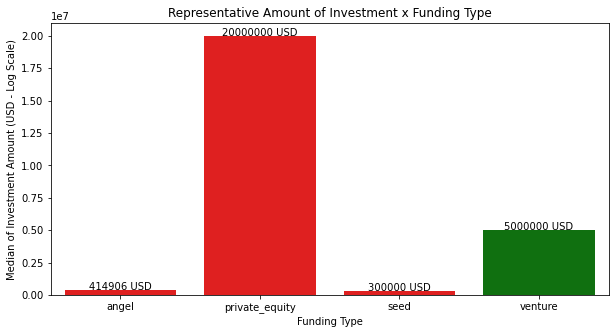

In [88]:
fig = plt.figure(figsize=(10,5))
groupedvalues=master_frame_types.groupby(['funding_round_type'],as_index=False)['raised_amount_usd'].median()
groupedvalues['raised_amount_usd']=groupedvalues['raised_amount_usd'].astype(int)
clrs = ['green' if ((x>=5000000)&((x<=15000000))) else 'red' for x in groupedvalues['raised_amount_usd']]
g=sns.barplot(data=groupedvalues,x='funding_round_type',y='raised_amount_usd',palette=clrs)
for index, row in groupedvalues.iterrows():
    g.text(row.name,(round(row.raised_amount_usd,0)), str(str(round(row.raised_amount_usd,0))+" USD"), color='black', ha="center")
plt.title("Representative Amount of Investment x Funding Type")
plt.ylabel('Median of Investment Amount (USD - Log Scale)')
plt.xlabel('Funding Type')
plt.show()

### 17.1 Observation

-  <font color=blue>This plot shows the representative values (Median Values were chosen from the analysis done above) of the four types of funding.
-  ***Venture*** Funding Type is shown in <font color=green>***Green***</font> to indicate that it is the most suitable funding type ***(5 Million USD)*** within the range of funding expected by ***Sparks Funds(5-15 Million USD)***.</font>

## 18.Total Investment Amount across Top 9 Countries

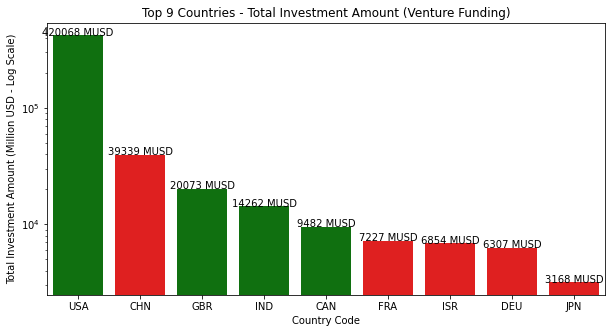

In [89]:
top9_eng2=top9_eng.copy()
top9_eng2['raised_amount_usd']=top9_eng['raised_amount_usd']/1000000
fig = plt.figure(figsize=(10,5))
clrs = ['green' if (x=="Yes") else 'red' for x in top9_eng2['Eng_Speaking']]
h=sns.barplot(data=top9_eng2,x='country_code',y='raised_amount_usd',palette=clrs)
for index, row in top9_eng2.iterrows():
    h.text(row.name,(round(row.raised_amount_usd,0)), str(str(int(round(row.raised_amount_usd,0)))+" MUSD"), color='black', ha="center")
plt.title("Top 9 Countries - Total Investment Amount (Venture Funding)")
plt.ylabel('Total Investment Amount (Million USD - Log Scale)')
plt.xlabel('Country Code')
plt.yscale('log')
plt.show()

### 18.1 Observation

-  <font color=blue>The plot shows the Top 9 Countries by the Investment Amount in ***Venutre Funding Type***.
-  The countries indicated in <font color=green>***Green***</font> are countries with Official Language as ***English***.
-  The top 3 countries are ***USA, GBR and IND***.
</font>

## 19. Top 3 Sectors (Venture Type) - Number of Investments

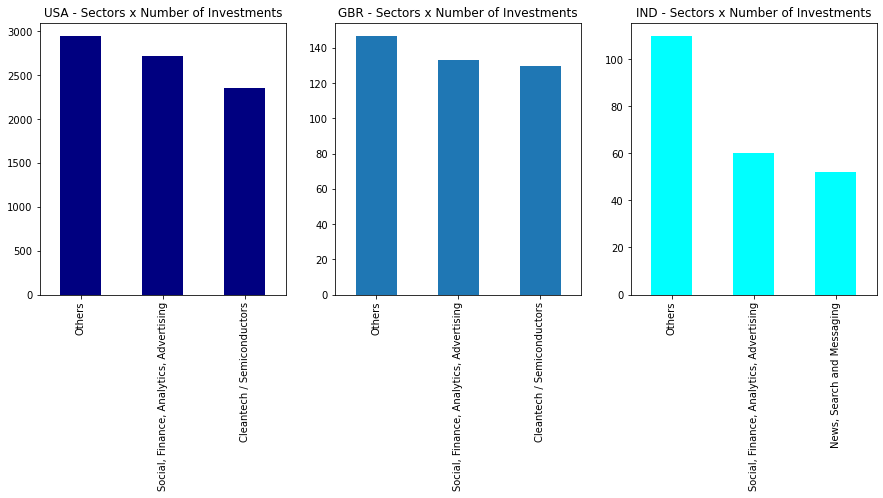

In [90]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
(D1.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False).head(3)).plot.bar(color='navy')
plt.title("USA - Sectors x Number of Investments")
plt.xlabel('')

plt.subplot(1, 3, 2)
(D2.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False).head(3)).plot.bar()
plt.title("GBR - Sectors x Number of Investments")
plt.xlabel('')

plt.subplot(1, 3, 3)
(D3.groupby(['sector'],as_index=True)['raised_amount_usd'].count().sort_values(ascending=False).head(3)).plot.bar(color='cyan')
plt.xlabel('')
plt.title("IND - Sectors x Number of Investments")
plt.show()

### 19.1 Observation

-  <font color=blue>The following Observations were made from the plot comparing the Top 3 Sectors in the Top 3 Countries by Number of Investments:
    -  ***Others*** Sector has the most number of investments in all 3 countries.
    -  ***Social, Finance, Analytics, Advertising*** has the second most number of investments in all 3 countries.
    -  ***Cleantech/Semiconductors*** has the 3rd most number of investments in USA and GBR.
    -  ***News, Search and Messagin*** has the 3rd most number of investments in IND.</font>

# <font color=red>END OF CHECKPOINT 6</font>